## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. 
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


### 3.

In [298]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

df_gss = pd.read_csv("./data/GSS.csv")
df_gss.head()

,year,id_,hrs1,wrkslf,weekswrk,joblose,jobfind,satjob,richwork,jobinc,jobsec,jobhour,jobpromo,jobmeans,ballot
0,1972,1,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,A little dissatisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Moderately satisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Very satisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


Opening the data, we can see *many* observations with inapplicable responses and values. This is due to the spread of data available among the variables we chose from GSS. Some variables were only collected during the 90s, others during the 70s or 80s, some up until today. To maximize the consistency of our data, we must pinpoint year that minimizes these discrepancies and NaN values.  

In [299]:
df_gss.head()

,year,id_,hrs1,wrkslf,weekswrk,joblose,jobfind,satjob,richwork,jobinc,jobsec,jobhour,jobpromo,jobmeans,ballot
0,1972,1,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,A little dissatisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Moderately satisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Very satisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [300]:
df_gss.isnull().sum()

year        0
id_         0
hrs1        0
wrkslf      0
weekswrk    0
joblose     0
jobfind     0
satjob      0
richwork    0
jobinc      0
jobsec      0
jobhour     0
jobpromo    0
jobmeans    0
ballot      0
dtype: int64

While we don't have null values, the GSS codebook has specific values that might as well be null or non-applicable. Below is just one example of the variety of these codes:

In [301]:
df_gss["weekswrk"].unique()

array(['.i:  Inapplicable', 'None or zero', '52', '44', '30', '40', '45',
       '.d:  Do not Know/Cannot Choose', '28', '21', '38', '24', '26',
       '25', '20', '12', '32', '42', '16', '48', '51', '50', '6', '43',
       '.n:  No answer', '22', '36', '4', '46', '15', '49', '2', '11',
       '35', '39', '31', '9', '8', '41', '47', '3', '10', '7', '34', '1',
       '5', '33', '14', '17', '27', '18', '37', '23', '13', '29', '19',
       '.s:  Skipped on Web', '.x:  Not available in this release'],
      dtype=object)

To resolve this, we must go through each of our 12 variables and ensure these codes are uniformly represented in our data. First, we must rely on the codebook to identify all the different types of codes:

In [302]:
codes = [
    ".i:  Inapplicable",
    ".m:  DK, NA, IAP",
    ".p:  Not applicable (I have not faced this decision)/Not imputable",
    ".j:  I do not have a job",
    ".y:  Not available in this year",
    ".x:  Not available in this release",
    ".r:  Refused",
    ".f:  Missing Birthdate Information",
    ".q:  Not imputable",
    ".u:  Uncodable",
    ".z:  Variable-specific reserve code",
    ".s:  Skipped on Web",
    ".d:  Do not Know/Cannot Choose",
    ".n:  No answer"
]

Now we know what to look for when replacing values for NaN. Year, id_, and ballot all look fine, so we can move on to cleaning more important variables. 

In [303]:
print(df_gss["year"].unique())
print(df_gss["id_"].unique())
print(df_gss["ballot"].unique())

[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021 2022 2024]
[   1    2    3 ... 4508 4509 4510]
['.i:  Inapplicable' 'Ballot b' 'Ballot c' 'Ballot a' 'Ballot d']


Now replace any values with the codes with NaN. This ensures these values do not appear in our visualizations, as we care less about the context of the missing data and more that it is not there to begin with.

In [304]:
df_gss = df_gss.replace(codes, np.nan)
df_gss["hrs1"].unique()

array([nan, '27', '40', '52', '35', '45', '70', '60', '42', '23', '55',
       '50', '6', '37', '36', '48', '16', '24', '20', '80', '65', '15',
       '39', '25', '22', '44', '26', '38', '12', '41', '84', '18', '54',
       '32', '3', '29', '51', '30', '89+ hrs', '43', '58', '28', '46',
       '8', '9', '19', '14', '66', '61', '49', '10', '72', '34', '75',
       '53', '7', '21', '47', '57', '71', '13', '5', '31', '17', '56',
       '4', '0', '33', '1', '68', '11', '2', '85', '62', '59', '78', '77',
       '64', '63', '67', '73', '88', '69', '76', '74', '81', '79', '86',
       '87', '83', '82'], dtype=object)

Our values look better, but we still need to handle the "89+ hrs", as well as convert these values to integers.

In [305]:
df_gss["hrs1"] = df_gss["hrs1"].astype(str)
df_gss["hrs1"] = df_gss["hrs1"].str.replace("89+ hrs", "89")
df_gss["hrs1"] = pd.to_numeric(df_gss["hrs1"], errors="coerce")
df_gss["hrs1"].unique()

array([nan, 27., 40., 52., 35., 45., 70., 60., 42., 23., 55., 50.,  6.,
       37., 36., 48., 16., 24., 20., 80., 65., 15., 39., 25., 22., 44.,
       26., 38., 12., 41., 84., 18., 54., 32.,  3., 29., 51., 30., 89.,
       43., 58., 28., 46.,  8.,  9., 19., 14., 66., 61., 49., 10., 72.,
       34., 75., 53.,  7., 21., 47., 57., 71., 13.,  5., 31., 17., 56.,
        4.,  0., 33.,  1., 68., 11.,  2., 85., 62., 59., 78., 77., 64.,
       63., 67., 73., 88., 69., 76., 74., 81., 79., 86., 87., 83., 82.])

Looks good! Let's keep going with other variables.

In [306]:
# looks good already
print(df_gss["wrkslf"].unique())

df_gss["weekswrk"] = df_gss["weekswrk"].astype(str)
df_gss["weekswrk"] = df_gss["weekswrk"].replace("None or zero", np.nan)
df_gss["weekswrk"] = pd.to_numeric(df_gss["weekswrk"], errors="coerce")
df_gss["weekswrk"].unique()

['Someone else' nan 'Self-employed']


array([nan, 52., 44., 30., 40., 45., 28., 21., 38., 24., 26., 25., 20.,
       12., 32., 42., 16., 48., 51., 50.,  6., 43., 22., 36.,  4., 46.,
       15., 49.,  2., 11., 35., 39., 31.,  9.,  8., 41., 47.,  3., 10.,
        7., 34.,  1.,  5., 33., 14., 17., 27., 18., 37., 23., 13., 29.,
       19.])

"None or zero" weeks worked in a year is equivalent to being unemployed, which falls under the code ".j:  I do not have a job", meaning we can remove it as well.

In [307]:
# all look good!
print(df_gss["joblose"].unique())
print(df_gss["jobfind"].unique())
print(df_gss["satjob"].unique())
print(df_gss["richwork"].unique())

[nan 'Not likely' 'Not too likely' 'Very likely' 'Fairly likely'
 'Leaving labor force']
[nan 'Not easy' 'Very easy' 'Somewhat easy']
['A little dissatisfied' nan 'Moderately satisfied' 'Very satisfied'
 'Very dissatisfied']
[nan 'Stop working' 'Continue to work']


Since these variables only contain their expected answers, our last five variables correspond to different job factors and how important each one is to an individual. 

In [308]:
rank_variables = ["jobinc", "jobsec", "jobhour", "jobpromo", "jobmeans"]

for var in rank_variables:
    print(df_gss[var].unique())

[nan 'FOURTH' 'SECOND' 'THIRD' 'MOST IMPT' 'FIFTH']
[nan 'MOST IMPT' 'FOURTH' 'FIFTH' 'THIRD' 'SECOND']
[nan 'FIFTH' 'THIRD' 'SECOND' 'FOURTH' 'MOST IMPT']
[nan 'SECOND' 'MOST IMPT' 'FOURTH' 'THIRD' 'FIFTH']
[nan 'THIRD' 'SECOND' 'FIFTH' 'MOST IMPT' 'FOURTH']


We can standardize this data by mapping each importance level to their corresponding integer.

In [309]:
ranking = {
    "MOST IMPT": 1,
    "SECOND": 2,
    "THIRD": 3,
    "FOURTH": 4,
    "FIFTH": 5
}

df_gss["jobinc"] = df_gss["jobinc"].map(ranking)
df_gss["jobsec"] = df_gss["jobsec"].map(ranking)
df_gss["jobhour"] = df_gss["jobhour"].map(ranking)
df_gss["jobpromo"] = df_gss["jobpromo"].map(ranking)
df_gss["jobmeans"] = df_gss["jobmeans"].map(ranking)


for var in rank_variables:
    print(df_gss[var].unique())

[nan  4.  2.  3.  1.  5.]
[nan  1.  4.  5.  3.  2.]
[nan  5.  3.  2.  4.  1.]
[nan  2.  1.  4.  3.  5.]
[nan  3.  2.  5.  1.  4.]


Now we can check out NaN counts for each variable:

In [310]:
df_gss.isna().sum()

year            0
id_             0
hrs1        32371
wrkslf       7350
weekswrk    46454
joblose     49722
jobfind     49839
satjob      21568
richwork    46041
jobinc      53893
jobsec      53894
jobhour     53898
jobpromo    53896
jobmeans    53885
ballot      21875
dtype: int64

Five variables have over 50,000 missing values! This is largely due to difference in overlap of years in which the variable data were collected. We can confirm this as follows:

[Text(0.5, 1.0, 'Count of jobmeans by Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count')]

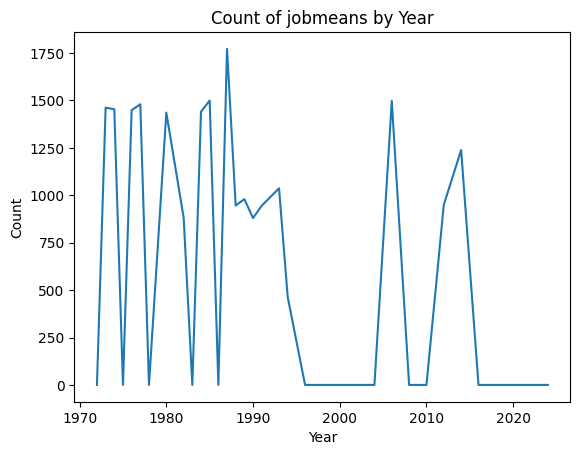

In [311]:
jobmeans_by_year = df_gss.groupby("year")["jobmeans"].count().reset_index()

fig = sns.lineplot(data=jobmeans_by_year, x="year", y="jobmeans")
fig.set(title="Count of jobmeans by Year",
xlabel="Year",
ylabel="Count")

Data was sparsely collected during the 70s and 80s, becoming more consistent during the early 90s. Yet, it remained dry up until 2006 and was only collected again in 2012 and 2014. The challenge here is deciding how to handle these missing values. While we are missing lots of data, we cannot drop entire columns due to the value the remaining values pose for our exploratory analysis. At the same time, we cannot impute these values because they correspond to specific years. Replacing missing values across years would be too strong of a generalization and contaminate any genuine patterns in our data. Thus, we can limit the scope of our data honing in on a specific year that minimizes our NaN values across all variables:

In [312]:
nans_by_year = df_gss.isna().groupby(df_gss["year"]).sum().sum(axis=1)
observations_by_year = df_gss.groupby("year").size()

nan_summary = pd.DataFrame({
    "Observations": observations_by_year,
    "NaNs Across All Variables": nans_by_year
})

nan_summary["NaN Ratio"] = nan_summary["NaNs Across All Variables"] / nan_summary["Observations"]
nan_summary_sorted = nan_summary.sort_values(by="NaN Ratio")
nan_summary_sorted

,Observations,NaNs Across All Variables,NaN Ratio
year,,,
1985,1534,6008,3.916558
1977,1530,6202,4.053595
1984,1473,7531,5.112695
1987,1819,9324,5.125893
1990,1372,7106,5.179300
1980,1468,7617,5.188692
1993,1606,8353,5.201121
1988,1481,7778,5.251857
1989,1537,8162,5.310345


Sorting by the ratio of NaN values to actual observations, we can see 1985 is the best year that minimizes these gaps. We will use this specific year moving forward. 

In [316]:
filtered_df_gss = df_gss[df_gss["year"] == 1985]